In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../df.csv')

In [16]:
df["HourUTC"] = pd.to_datetime(df["HourUTC"])
print(df.head(5))


              HourUTC PriceArea  SpotPriceEUR  Forecast1Hour_Offshore Wind  \
0 2022-09-01 00:00:00       DK1    486.339996                    62.916668   
1 2022-09-01 00:00:00       DK2    486.339996                    16.750000   
2 2022-09-01 01:00:00       DK1    480.019989                    24.250000   
3 2022-09-01 01:00:00       DK2    480.019989                    12.000000   
4 2022-09-01 02:00:00       DK1    495.179993                    12.375000   

   Forecast1Hour_Onshore Wind  Forecast1Hour_Solar  \
0                  130.541672             0.000417   
1                   54.500000             0.000000   
2                  115.791664             0.000000   
3                   41.625000             0.000000   
4                  100.375000             0.000000   

   Forecast5Hour_Offshore Wind  Forecast5Hour_Onshore Wind  \
0                   103.916664                  148.208328   
1                    17.583334                   40.958332   
2                   

**Undgå data leakage: Split data op i træning og validering, før NaN håndtering.**

In [24]:
df_train = df[df['HourUTC'] < df['HourUTC'].min() + pd.DateOffset(months=30)]
df_walk_forward = df[df['HourUTC'] >= df['HourUTC'].min() + pd.DateOffset(months=30)]
print(df_train.head(2))
print(df_walk_forward.head(2))

#Hvor mange dage (24 timer i døgnet, DK1 og DK2...) dag=48index
print('--------------------------------------------------------')
print(f'Train dataframe has a length of {len(df_train)} which is {len(df_train)/(24 * 2)} days')
print(f'Validation dataframe has a length of {len(df_walk_forward)} which is {len(df_walk_forward)/(24*2)}')


     HourUTC PriceArea  SpotPriceEUR  Forecast1Hour_Offshore Wind  \
0 2022-09-01       DK1    486.339996                    62.916668   
1 2022-09-01       DK2    486.339996                    16.750000   

   Forecast1Hour_Onshore Wind  Forecast1Hour_Solar  \
0                  130.541672             0.000417   
1                   54.500000             0.000000   

   Forecast5Hour_Offshore Wind  Forecast5Hour_Onshore Wind  \
0                   103.916664                  148.208328   
1                    17.583334                   40.958332   

   Forecast5Hour_Solar  ForecastDayAhead_Offshore Wind  \
0                  0.0                      100.541664   
1                  0.0                       21.666666   

   ForecastDayAhead_Onshore Wind  ForecastDayAhead_Solar  \
0                     111.166664                     0.0   
1                      40.583332                     0.0   

   ForecastIntraday_Offshore Wind  ForecastIntraday_Onshore Wind  \
0                 

**Plot Spotprice DK1 og DK2**

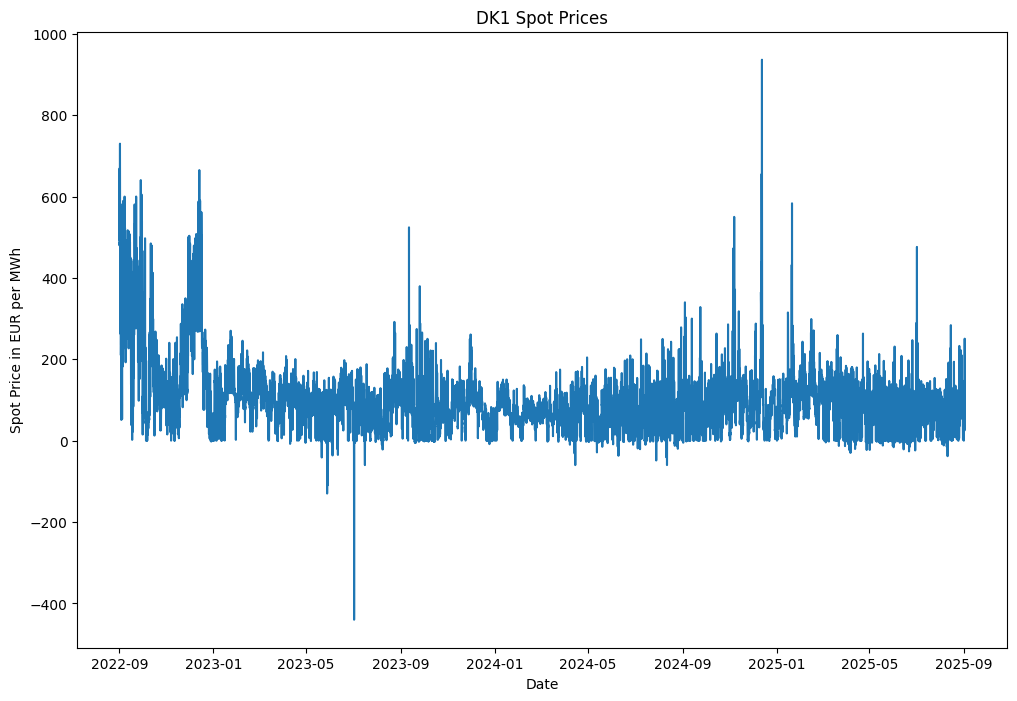

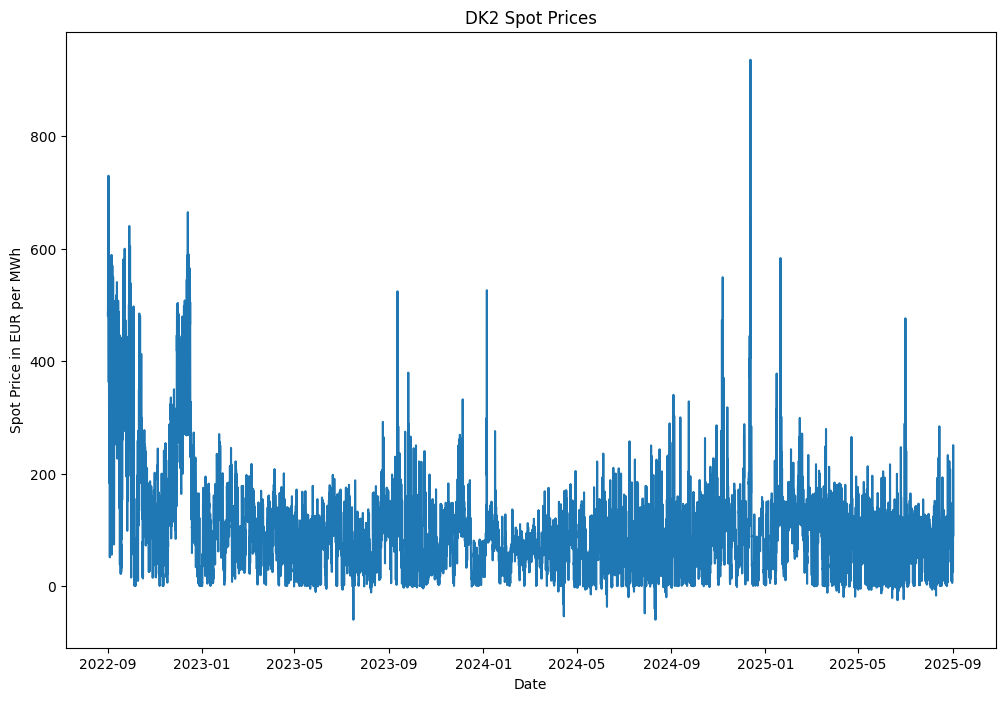

In [25]:
# DK1
dk1 = df[df['PriceArea'] == 'DK1']
plt.figure(figsize=(12,8))
plt.plot(dk1['HourUTC'], dk1['SpotPriceEUR'])
plt.xlabel('Date')
plt.ylabel('Spot Price in EUR per MWh')
plt.title('DK1 Spot Prices')
plt.show()

# DK2
dk2 = df[df['PriceArea'] == 'DK2']
plt.figure(figsize=(12,8))
plt.plot(dk2['HourUTC'], dk2['SpotPriceEUR'])
plt.xlabel('Date')
plt.ylabel('Spot Price in EUR per MWh')
plt.title('DK2 Spot Prices')
plt.show()

**Plot DK1-DK2**

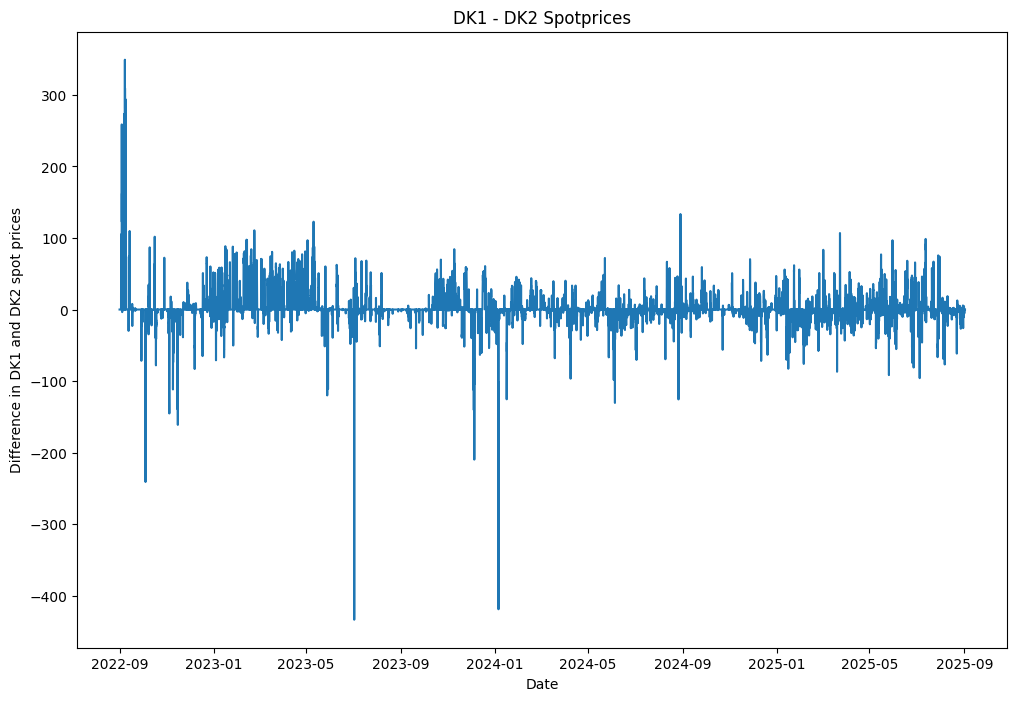

In [42]:
DK1 = df[df['PriceArea'] == 'DK1'][['HourUTC', 'SpotPriceEUR']].reset_index()
DK2 = df[df['PriceArea'] == 'DK2'][['HourUTC', 'SpotPriceEUR']].reset_index()
dif_series = DK1['SpotPriceEUR'] - DK2['SpotPriceEUR']


plt.figure(figsize=(12,8))
plt.plot(DK1['HourUTC'], dif_series)
plt.xlabel('Date')
plt.ylabel('Difference in DK1 and DK2 spot prices')
plt.title('DK1 - DK2 Spotprices')
plt.show()